In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb # pip install lightgbm


In [125]:
url = 'https://raw.githubusercontent.com/JacksonvBarbosa/Analise_Indice_Ibovespa/refs/heads/sofia/data/processed/dados_historicos_ibovespa_2015-2025_processed.csv'

dados = pd.read_csv(url)

dados.head()

,ds,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,...,atr_14,obv,day_of_week,day_of_month,month,year,eua_return_lag1,china_return_lag1,europe_return_lag1,oil_return_lag1
0,2015-06-17,1,53249,53698,53755,52965,3090000.0,-0.0084,0.0106,-0.0039,...,889.081392,78500090.0,2,17,6,2015,0.005690,-0.034675,0.005638,0.000319
1,2015-06-18,0,54239,53251,54352,53214,2750000.0,0.0186,-0.0084,0.0106,...,906.861293,81250090.0,3,18,6,2015,0.001980,0.016464,-0.008863,0.019799
2,2015-06-19,1,53749,54236,54236,53479,2950000.0,-0.0090,0.0186,-0.0084,...,896.371201,78300090.0,4,19,6,2015,0.009903,-0.036744,0.002265,0.006106
3,2015-06-22,0,53864,53750,54342,53655,2430000.0,0.0021,-0.0090,0.0186,...,881.416115,80730090.0,0,22,6,2015,-0.005304,-0.064152,0.003586,-0.019297
4,2015-06-23,1,53772,53865,54361,53772,2710000.0,-0.0017,0.0021,-0.0090,...,860.529250,78020090.0,1,23,6,2015,0.006095,0.000000,0.035052,0.005078


In [126]:
dados.describe().T


,count,mean,std,min,25%,50%,75%,max
target,2482.0,5.229654e-01,4.995730e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
close,2482.0,9.576167e+04,2.669689e+04,3.749700e+04,7.431900e+04,1.024665e+05,1.174145e+05,1.401100e+05
open,2482.0,9.572810e+04,2.669610e+04,3.750100e+04,7.431300e+04,1.024035e+05,1.173700e+05,1.401090e+05
high,2482.0,9.657999e+04,2.679427e+04,3.803100e+04,7.503500e+04,1.036075e+05,1.182875e+05,1.403820e+05
low,2482.0,9.490808e+04,2.659171e+04,3.704600e+04,7.326800e+04,1.015470e+05,1.162638e+05,1.389660e+05
volume,2482.0,4.883084e+08,2.275271e+09,4.243200e+05,3.930000e+06,7.620000e+06,1.120000e+07,2.487000e+10
daily_return,2482.0,4.959710e-04,1.499167e-02,-1.478000e-01,-7.200000e-03,7.000000e-04,8.400000e-03,1.391000e-01
return_lag_1,2482.0,5.006044e-04,1.499302e-02,-1.478000e-01,-7.200000e-03,7.000000e-04,8.400000e-03,1.391000e-01
return_lag_2,2482.0,5.002417e-04,1.499311e-02,-1.478000e-01,-7.200000e-03,7.000000e-04,8.400000e-03,1.391000e-01
return_lag_3,2482.0,4.916600e-04,1.499096e-02,-1.478000e-01,-7.200000e-03,7.000000e-04,8.400000e-03,1.391000e-01


## Vendo a correlação

In [127]:

correlation = dados.corr(numeric_only=True)['target'].drop('target')
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)


daily_return          0.051470
momentum_63           0.039835
day_of_week           0.027458
eua_return_lag1       0.027224
sma_21                0.025974
close                 0.025870
low                   0.025104
europe_return_lag1    0.024928
high                  0.023864
ema_50                0.023795
open                  0.023453
momentum_5            0.020186
return_lag_5          0.018753
oil_return_lag1       0.016847
year                  0.014467
day_of_month          0.014420
return_lag_4          0.012600
return_lag_2          0.011113
china_return_lag1     0.010371
volume                0.010260
obv                   0.010000
return_lag_1          0.008498
month                 0.007723
rsi_14                0.004652
momentum_21           0.004435
return_lag_3          0.002964
atr_14                0.001491
Name: target, dtype: float64


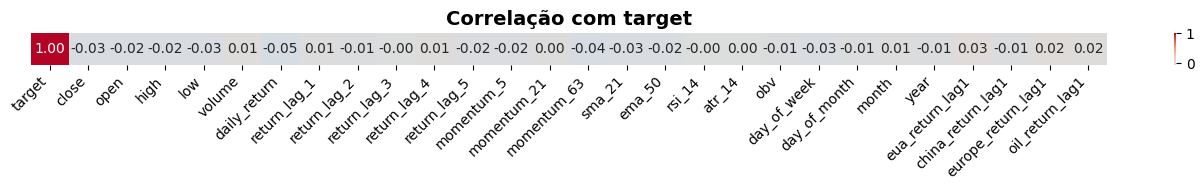

In [128]:

# Matriz de correlação
corr_matrix = dados.corr(numeric_only=True)

# Focar nas correlações com target
plt.figure(figsize=(14, 2))  # largura maior e altura menor
sns.heatmap(
    corr_matrix[['target']].T,
    annot=True,
    fmt=".2f",               # duas casas decimais
    cmap='coolwarm',
    center=0,
    cbar=True,
    annot_kws={"size": 10}
)

plt.title('Correlação com target', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks([])  # oculta o eixo y para foco nas colunas
plt.tight_layout()
plt.show()



In [129]:
import statsmodels.api as sm

# Separar variáveis numéricas e a variável alvo
X = dados.drop(columns='target').select_dtypes(include='number')
y = dados['target']

# Adicionar a constante (intercepto)
X_const = sm.add_constant(X)

# Ajustar o modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X_const).fit()

# Mostrar os resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.294
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.142
Time:                        12:09:02   Log-Likelihood:                -1781.2
No. Observations:                2482   AIC:                             3618.
Df Residuals:                    2454   BIC:                             3781.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.8128     23

<Axes: title={'center': 'Importância das variáveis'}>

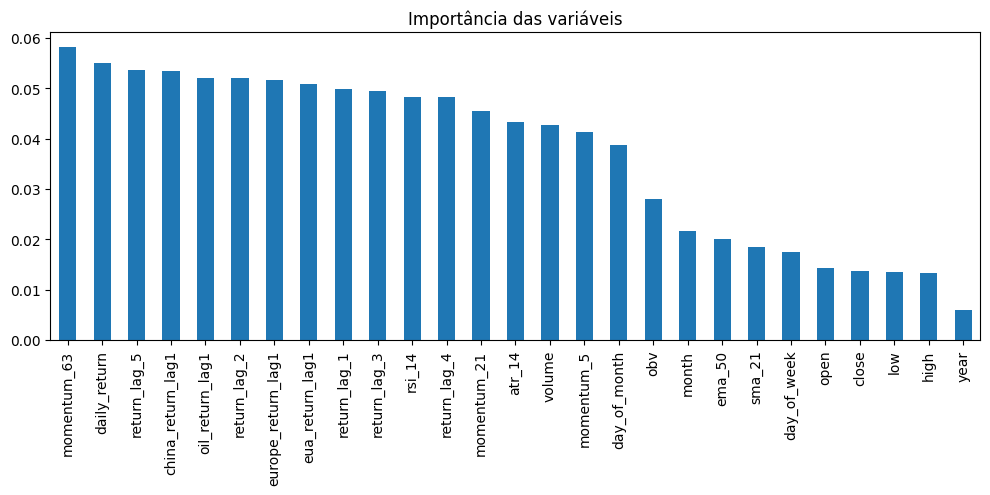

In [130]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), title='Importância das variáveis')


In [ ]:
#Selecionando as 10 melhores variáveis com base na importância
top_features = [
    'momentum_63', 'daily_return', 'return_lag_5', 'china_return_lag1',
    'oil_return_lag1', 'return_lag_2', 'europe_return_lag1',
    'eua_return_lag1', 'return_lag_1', 'return_lag_3'
]

#Separando os últimos 30 dias
df_final = dados.tail(30).copy()
df_model = dados.iloc[:-30].copy()


In [ ]:
#Separando X e y
X = df_model[top_features]
y = df_model['target']

#Dividindo treino e teste (80/20 aleatório)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_final_scaled = scaler.transform(df_final[top_features])


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

#treinando os modelos e avaliando
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)

    print(f'\n{name}')
    print(f'R²: {r2:.4f}')
    
    future_preds = model.predict(X_final_scaled)
    print(f'Previsões últimos 30 dias: {np.round(future_preds, 4)}')


Linear Regression
R²: -0.0089
Previsões últimos 30 dias: [0.4677 0.5442 0.5316 0.5264 0.5468 0.4928 0.5316 0.5336 0.5145 0.5605
 0.5223 0.5181 0.5116 0.5232 0.5475 0.5211 0.5406 0.5306 0.5247 0.5409
 0.5319 0.5298 0.5504 0.5156 0.5263 0.514  0.528  0.5022 0.5418 0.519 ]

Random Forest
R²: -0.0107
Previsões últimos 30 dias: [0.49 0.5  0.52 0.57 0.49 0.56 0.45 0.41 0.38 0.56 0.67 0.44 0.62 0.6
 0.64 0.47 0.82 0.48 0.37 0.43 0.49 0.38 0.46 0.49 0.31 0.39 0.42 0.61
 0.48 0.56]

KNN
R²: -0.2406
Previsões últimos 30 dias: [0.6 0.8 0.4 0.8 0.6 0.6 0.4 0.2 0.4 0.4 0.4 0.4 0.4 0.2 0.6 0.4 0.6 0.4
 0.2 0.6 0.8 0.2 0.6 0.8 0.2 0.4 0.4 0.8 0.4 0.6]


In [ ]:
#Separando as 10 'melhores' variáveis
top_features = [
    'momentum_63', 'daily_return', 'return_lag_5', 'china_return_lag1',
    'oil_return_lag1', 'return_lag_2'
]

#Separando os últimos 30 dias
df_final = dados.tail(30).copy()
df_model = dados.iloc[:-30].copy()


In [ ]:
#Separando X e y
X = df_model[top_features]
y = df_model['target']

#Divisao treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle= False#random_state=42
)

In [ ]:
#Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_final_scaled = scaler.transform(df_final[top_features])

In [138]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Treinar, avaliar e prever os últimos 30 dias
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)

    print(f'\n{name}')
    print(f'R²: {r2:.4f}')
    
    


Linear Regression
R²: -0.0018

Random Forest
R²: -0.0475

KNN
R²: -0.2257


## Testando modelos de Classificação

In [139]:
# testando classificação

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [140]:
top_features_classification = [
    'momentum_63', 'daily_return', 'return_lag_5', 'china_return_lag1',
    'oil_return_lag1', 'return_lag_2', 'europe_return_lag1',
    'eua_return_lag1', 'return_lag_1', 'return_lag_3'
]

X = dados[top_features_classification]
y = dados['target']

In [ ]:
#Divisão cronológica (sem embaralhar)
split_index = int(len(dados) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Tamanho do treino: {len(X_train)} amostras")
print(f"Tamanho do teste: {len(X_test)} amostras")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tamanho do treino: 1985 amostras
Tamanho do teste: 497 amostras


Random Forest
Acurácia: 0.5151
ROC AUC: 0.5537

Relatório de Classificação Detalhado (Random Forest):
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       247
           1       0.52      0.59      0.55       250

    accuracy                           0.52       497
   macro avg       0.51      0.51      0.51       497
weighted avg       0.51      0.52      0.51       497



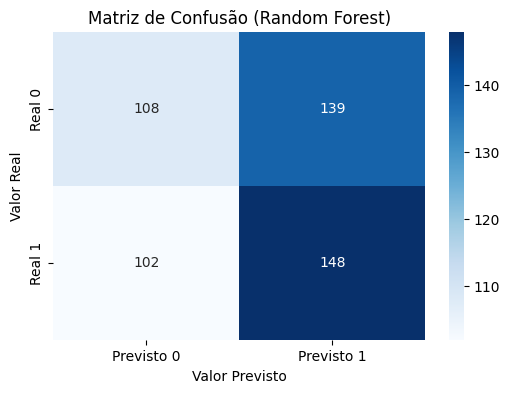

KNN
Acurácia: 0.4909
ROC AUC: 0.4933


In [ ]:
#modelos
models = {
    'Random Forest': RandomForestClassifier(random_state= 42), 
    'KNN': KNeighborsClassifier()
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    preds_proba = model.predict_proba(X_test_scaled)[:, 1] #seleciona tudo que for igual a 1 (classe = 1 - teve alta)

    accuracy = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds_proba)

    print(name)
    print(f'Acurácia: {accuracy:.4f}')
    print(f'ROC AUC: {auc:.4f}')
    
    #Relatório detalhado do Random Forest
    if name == 'Random Forest':
        print("\nRelatório de Classificação Detalhado (Random Forest):")
        print(classification_report(y_test, preds))
        
        #Matriz de Confusão
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto 0', 'Previsto 1'], yticklabels=['Real 0', 'Real 1'])
        plt.title('Matriz de Confusão (Random Forest)')
        plt.ylabel('Valor Real')
        plt.xlabel('Valor Previsto')
        plt.show()

## Regressão Logística

In [143]:
#selecionando X e Y
X = dados.drop(columns=['target', 'close'], errors='ignore')
X = X.select_dtypes(include=['float64', 'int64'])  #apenas colunas numéricas
y = dados['target']

X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [144]:
#normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
#treinando e prevendo o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

previsao = model.predict(X_test_scaled)
probabilidade = model.predict_proba(X_test_scaled)[:, 1]

In [146]:
acc = accuracy_score(y_test, previsao)
auc = roc_auc_score(y_test, probabilidade)

print('\n🔍 Regressão Logística')
print(f'Acurácia: {acc:.4f}')
print(f'AUC: {auc:.4f}')
print('\nMatriz de Confusão:')
print(confusion_matrix(y_test, previsao))
print('\nRelatório de Classificação:')
print(classification_report(y_test, previsao))


🔍 Regressão Logística
Acurácia: 0.5667
AUC: 0.6429

Matriz de Confusão:
[[15  1]
 [12  2]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.94      0.70        16
           1       0.67      0.14      0.24        14

    accuracy                           0.57        30
   macro avg       0.61      0.54      0.47        30
weighted avg       0.61      0.57      0.48        30



## Arima usando Auto Arima

In [147]:
from pmdarima import auto_arima #pip install pmdarima

serie = dados['close'].dropna()
serie.index = pd.to_datetime(dados.index)#garantindo que o ídice esteja como data

# Separando treino e teste (últimos 30 dias como teste)
train = serie[:-30]
test = serie[-30:]

In [148]:
#Automatizando os parâmetros para o modelo ajustar com os melhores
stepwise_model = auto_arima(
    train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=None,           # auto detecta d
    seasonal=False,
    stepwise=True,
    #trace=True,
    #error_action='ignore',
    #suppress_warnings=True
);

#parâmetros encontrados
print(stepwise_model.summary());



C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2452
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -21125.268
Date:                Wed, 16 Jul 2025   AIC                          42254.536
Time:                        12:09:21   BIC                          42266.145
Sample:                    01-01-1970   HQIC                         42258.755
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0641      0.007     -9.195      0.000      -0.078      -0.050
sigma2       1.79e+06   2.03e+04     88.391      0.000    1.75e+06    1.83e+06
Ljung-Box (L1) (Q):                   1.39   Jarque-

In [149]:
#previsao e avaliacao
forecast = stepwise_model.predict(n_periods=30)
forecast = pd.Series(forecast, index=test.index)

mse = mean_squared_error(test, forecast)
print(f'\nMSE: {mse:.2f}')
print(f'RMSE: {mse**0.5:.2f}')


MSE: 21033357.54
RMSE: 4586.21


C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


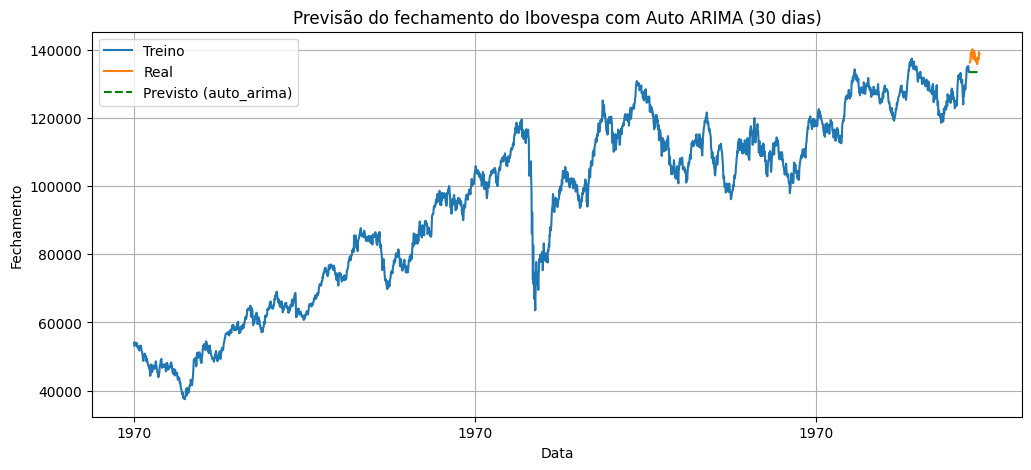

In [150]:
#gráfico
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Real')
plt.plot(forecast.index, forecast, label='Previsto (auto_arima)', linestyle='--', color='green')
plt.title('Previsão do fechamento do Ibovespa com Auto ARIMA (30 dias)')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid()
plt.show();

### Arima com Rolling Forecast

In [151]:
'''serie = dados['close'].dropna()
serie.index = pd.to_datetime(dados.index) ///
'''
train = serie[:-30]
test = serie[-30:]
historico = list(train)
predicoes = []


In [152]:
#Rolling Forecast / avaliacao
for t in range(len(test)):
    model = ARIMA(historico, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predicoes.append(yhat)
    historico.append(test.iloc[t])
    
rmse = np.sqrt(mean_squared_error(test, predicoes)) # por algum motivo squared = False nao está rodando no código. Entao usei o numpy pra achar o rmse
print(f'Rolling Forecast RMSE: {rmse:.2f}')

Rolling Forecast RMSE: 1060.23


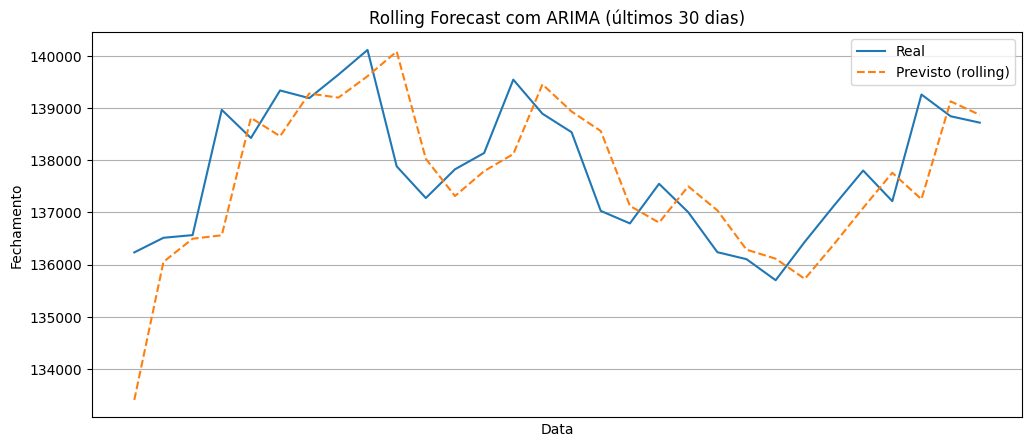

In [153]:
#visualizacao grafica
plt.figure(figsize=(12,5))
plt.plot(test.index, test.values, label='Real')
plt.plot(test.index, predicoes, label='Previsto (rolling)', linestyle='--')
plt.title('Rolling Forecast com ARIMA (últimos 30 dias)')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid()
plt.show()